# Purpose

Students have the option of using Pandas and SQL to complete this project. A Phase 1 project done completely in pandas, completely in SQL, or a mixture of the two can all be considered a fine Phase 1 project. This notebook serves as a resource for setting up an SQL database for students who wish to use SQL in their Phase 1 project.

**To create the `movies.db` database, run the code cells below.**
> The Entity Relational Diagram is below

In [2]:
import sqlite3
import requests
import seaborn as sns
#cur = conn.cursor()
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from src.make_db import create_movies_db

In [3]:
create_movies_db()

imdb_title_principals table created successfully....
imdb_name_basic table created successfully....
imdb_title_crew table created successfully....
imdb_title_ratings table created successfully....
imdb_title_basics table created successfully....
imdb_title_akas table created successfully....
tn_movie_budgets table created successfully....
tmdb_movies table created successfully....
bom_movie_gross table created successfully....
rotten_tomatoes_critic_reviews table created successfully....
rotten_tomatoes_movies table created successfully....
Inserting data into the imdb_title_crew table....
Inserting data into the tmdb_movies table....
Inserting data into the imdb_title_akas table....
Inserting data into the imdb_title_ratings table....
Inserting data into the imdb_name_basics table....
Inserting data into the rotten_tomatoes_movies table....
Inserting data into the rotten_tomatoes_critic_reviews table....
Inserting data into the imdb_title_basics table....
Inserting data into the tn_mo

In [5]:
conn = sqlite3.connect('data\movies.db')
movie_title = pd.read_sql ('''SELECT genres , domestic_gross
                              FROM imdb_title_basics
                              JOIN tn_movie_budgets
                              ON primary_title=movie
                              
                              
                              ''',conn)

movie_title

,genres,domestic_gross
0,"Action,Animation,Comedy",$0
1,"Action,Adventure,Fantasy","$70,433,227"
2,None,"$1,109,808"
3,"Adventure,Drama,Romance","$720,828"
4,"Adventure,Comedy,Drama","$58,236,838"
...,...,...
3810,None,"$6,916,869"
3811,Drama,"$8,224,288"
3812,Documentary,$0
3813,Comedy,"$1,017,107"


In [31]:
# movie_title = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
#df.domestic_gross.translate({ord('$'): None})
movie_title['domestic_gross'] = movie_title['domestic_gross'].str.replace('$', '').str.replace(',','')
movie_title['domestic_gross'] = movie_title['domestic_gross'].astype(int)

In [32]:
movie_title = movie_title.groupby('genres',as_index=False).mean()
pd.set_option('display.float_format', '{:.2f}'.format)
#movie_title

In [33]:
genres = list(set([y for x in [a.split(',') for a in movie_title['genres']] for y in x]))
genres

['Music',
 'Crime',
 'Mystery',
 'Reality-TV',
 'Romance',
 'History',
 'Drama',
 'Western',
 'Animation',
 'Action',
 'Horror',
 'Sci-Fi',
 'Fantasy',
 'Musical',
 'News',
 'Sport',
 'Documentary',
 'Adventure',
 'Comedy',
 'Thriller',
 'Family',
 'War',
 'Biography']

In [34]:
movie_title['genres'] = movie_title['genres'].str.split(',')
movie_title2 = pd.get_dummies(pd.DataFrame(movie_title['genres'].tolist()).stack()).sum(level=0)
movie_title = pd.concat([movie_title, movie_title2], axis=1).drop(columns=['genres'])
movie_title


,domestic_gross,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,27614645.41,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,56049608.83,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,156725242.94,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,56717186.60,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,111544514.70,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,26080272.38,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
341,14551149.33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
342,25263527.54,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
343,51870018.50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [85]:
movie_title.corr().sort_values('domestic_gross', ascending=False)

,domestic_gross,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
domestic_gross,1.00,0.06,0.19,0.12,-0.04,0.03,-0.11,-0.09,-0.07,0.12,...,0.16,-0.07,-0.04,-0.04,-0.00,0.01,0.02,-0.08,-0.08,-0.01
Adventure,0.19,0.03,1.00,0.07,-0.06,-0.04,-0.08,-0.02,-0.11,-0.01,...,-0.10,-0.05,-0.04,-0.03,-0.09,-0.02,-0.03,-0.14,-0.08,-0.00
Fantasy,0.19,-0.03,-0.05,0.03,-0.11,-0.03,-0.08,-0.16,-0.07,0.06,...,0.12,-0.05,-0.03,-0.02,-0.07,-0.06,-0.11,-0.04,-0.06,-0.03
Musical,0.16,-0.11,-0.10,0.01,-0.02,-0.01,-0.03,-0.09,0.05,-0.03,...,1.00,-0.07,-0.02,-0.01,-0.02,-0.07,-0.05,-0.09,-0.05,-0.04
Animation,0.12,-0.05,0.07,1.00,-0.08,-0.02,-0.09,0.02,-0.10,0.10,...,0.01,-0.09,-0.02,-0.01,-0.09,-0.01,-0.06,-0.11,-0.06,-0.05
Family,0.12,-0.10,-0.01,0.10,-0.03,-0.04,-0.10,-0.03,-0.02,1.00,...,-0.03,-0.10,-0.03,-0.02,-0.03,-0.06,-0.01,-0.12,-0.09,-0.06
Action,0.06,1.00,0.03,-0.05,-0.06,-0.06,0.04,-0.14,-0.18,-0.10,...,-0.11,-0.04,-0.04,-0.03,-0.05,-0.00,0.01,-0.03,-0.01,0.02
Comedy,0.03,-0.06,-0.04,-0.02,-0.06,1.00,-0.03,-0.16,-0.18,-0.04,...,-0.01,-0.06,-0.04,-0.03,0.08,-0.03,-0.02,-0.09,-0.10,-0.06
Sport,0.02,0.01,-0.03,-0.06,0.04,-0.02,-0.06,0.06,0.00,-0.01,...,-0.05,-0.09,-0.02,-0.01,-0.01,-0.09,1.00,-0.07,-0.06,-0.05
Sci-Fi,0.01,-0.00,-0.02,-0.01,-0.11,-0.03,-0.07,-0.12,-0.11,-0.06,...,-0.07,0.09,-0.03,-0.02,-0.03,1.00,-0.09,0.02,-0.08,-0.06


In [28]:
production_gross = pd.read_sql ('''SELECT movie, release_date,  production_budget, worldwide_gross, genres
                                    FROM tn_movie_budgets
                                    JOIN imdb_title_basics
                                    ON movie=primary_title
                                ''',conn)
production_gross

,movie,release_date,production_budget,worldwide_gross,genres
0,Avatar,"Dec 18, 2009","$425,000,000","$2,776,345,279",Horror
1,Pirates of the Caribbean: On Stranger Tides,"May 20, 2011","$410,600,000","$1,045,663,875","Action,Adventure,Fantasy"
2,Dark Phoenix,"Jun 7, 2019","$350,000,000","$149,762,350","Action,Adventure,Sci-Fi"
3,Avengers: Age of Ultron,"May 1, 2015","$330,600,000","$1,403,013,963","Action,Adventure,Sci-Fi"
4,Avengers: Infinity War,"Apr 27, 2018","$300,000,000","$2,048,134,200","Action,Adventure,Sci-Fi"
...,...,...,...,...,...
3810,Cure,"Jul 6, 2001","$10,000","$94,596",Drama
3811,Bang,"Apr 1, 1996","$10,000",$527,None
3812,Newlyweds,"Jan 13, 2012","$9,000","$4,584","Comedy,Drama"
3813,Red 11,"Dec 31, 2018","$7,000",$0,"Horror,Sci-Fi,Thriller"


In [29]:
production_gross['worldwide_gross'] = production_gross['worldwide_gross'].str.replace('$', '').str.replace(',','')
production_gross['worldwide_gross'] = production_gross['worldwide_gross'].astype(float)\
    

In [30]:
production_gross['production_budget'] = production_gross['production_budget'].str.replace('$', '').str.replace(',','')
production_gross['production_budget'] = production_gross['production_budget'].astype(float)


In [31]:
production_gross.sort_values('production_budget', ascending=False)

,movie,release_date,production_budget,worldwide_gross,genres
0,Avatar,"Dec 18, 2009",425000000.0,2.776345e+09,Horror
1,Pirates of the Caribbean: On Stranger Tides,"May 20, 2011",410600000.0,1.045664e+09,"Action,Adventure,Fantasy"
2,Dark Phoenix,"Jun 7, 2019",350000000.0,1.497624e+08,"Action,Adventure,Sci-Fi"
3,Avengers: Age of Ultron,"May 1, 2015",330600000.0,1.403014e+09,"Action,Adventure,Sci-Fi"
4,Avengers: Infinity War,"Apr 27, 2018",300000000.0,2.048134e+09,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...
3810,Cure,"Jul 6, 2001",10000.0,9.459600e+04,Drama
3811,Bang,"Apr 1, 1996",10000.0,5.270000e+02,None
3812,Newlyweds,"Jan 13, 2012",9000.0,4.584000e+03,"Comedy,Drama"
3813,Red 11,"Dec 31, 2018",7000.0,0.000000e+00,"Horror,Sci-Fi,Thriller"


In [32]:
production_gross.drop_duplicates(subset ="movie",
                     keep = False, inplace = True)

In [33]:
production_gross

,movie,release_date,production_budget,worldwide_gross,genres
0,Avatar,"Dec 18, 2009",425000000.0,2.776345e+09,Horror
1,Pirates of the Caribbean: On Stranger Tides,"May 20, 2011",410600000.0,1.045664e+09,"Action,Adventure,Fantasy"
2,Dark Phoenix,"Jun 7, 2019",350000000.0,1.497624e+08,"Action,Adventure,Sci-Fi"
3,Avengers: Age of Ultron,"May 1, 2015",330600000.0,1.403014e+09,"Action,Adventure,Sci-Fi"
4,Avengers: Infinity War,"Apr 27, 2018",300000000.0,2.048134e+09,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...
3808,Clean,"Apr 28, 2006",10000.0,1.387110e+05,"Comedy,Drama,Horror"
3811,Bang,"Apr 1, 1996",10000.0,5.270000e+02,None
3812,Newlyweds,"Jan 13, 2012",9000.0,4.584000e+03,"Comedy,Drama"
3813,Red 11,"Dec 31, 2018",7000.0,0.000000e+00,"Horror,Sci-Fi,Thriller"


Text(0.5, 1.0, 'Linear Regression of Production Budget Compared to Worldwide Gross')

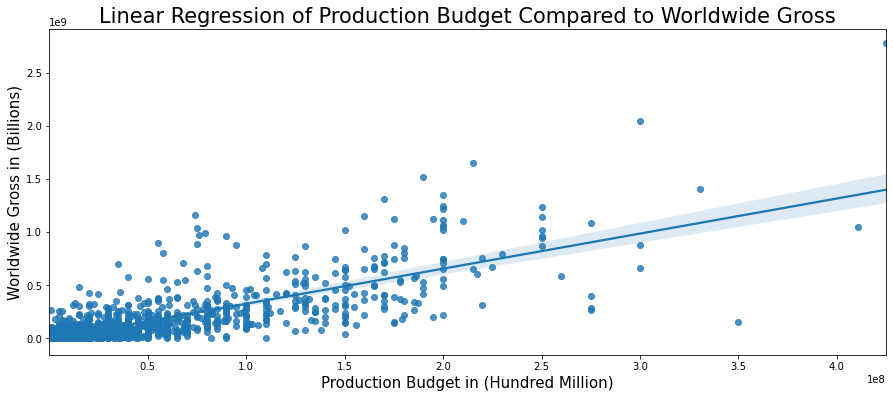

In [34]:
fig, ax = plt.subplots(figsize=(15,6))
#plt.xlim([0,2])

sns.regplot(data=production_gross, x="production_budget", y="worldwide_gross")
ax.set_ylabel('Worldwide Gross in (Billions)', fontsize=15)
ax.set_xlabel('Production Budget in (Hundred Million)', fontsize=15)
ax.set_title('Linear Regression of Production Budget Compared to Worldwide Gross', fontsize = 21)

Text(0.5, 1.0, 'Linear Regression of Production Budget Compared to Worldwide Gross')

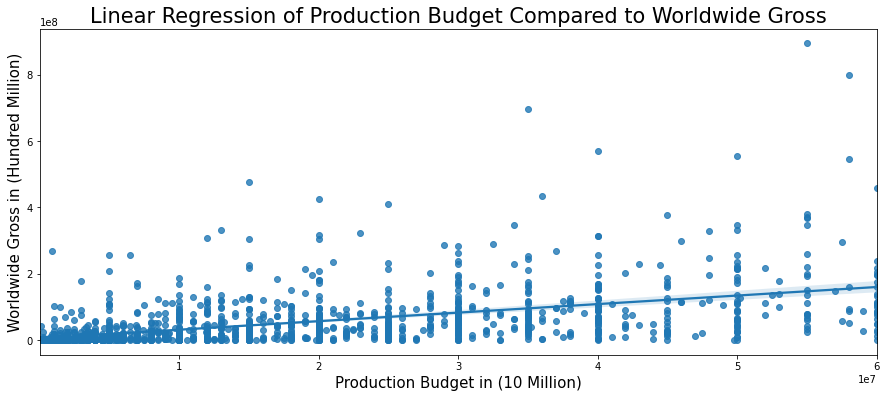

In [25]:
fig, ax = plt.subplots(figsize=(15,6))
#plt.xlim([0,2])

sns.regplot(data=production_gross.loc[production_gross['production_budget'] <= 60000000 ], x="production_budget", y="worldwide_gross")
ax.set_ylabel('Worldwide Gross in (Hundred Million)', fontsize=15)
ax.set_xlabel('Production Budget in (10 Million)', fontsize=15)
ax.set_title('Linear Regression of Production Budget Compared to Worldwide Gross', fontsize = 21)

![movies.db schema](images/movies_db_schema.png)